# Assignment: MNIST Classification & Feature Map Regressions

Environment Setup:

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Common imports
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 1. Classification Trees and Boosting
Import data:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

Build a **binary classifier** for the ``MNIST`` dataset that determines **whether an input image is digit $7$ or not**:

In [181]:
digit_7 = []
for i in mnist['target']:
    if i == '7':
        digit_7.append(1)
    else:
        digit_7.append(0)
digit_7 = np.array(digit_7)

Split dataset into 70-30 train-test:

In [182]:
# X, y = mnist['data'], mnist['target']
X, y = mnist['data'], digit_7

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42)

Using **5-fold cross validation** on the training set, find the optimal model parameters of the following Tree models:

Note that remember to describe the procedure of which parameters I choose to search over and explain the logic. 

- (a) Gradient Boosting with 'deviance' loss. Use the ``GradientBoostingClassifier`` class of sklearn ``grid search`` over the parameter space. Save the optimal model ``clf_gb_opt``

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
predictor = GradientBoostingClassifier(random_state=42)
param_grid = [
    {
        'max_depth': [1, 3, 5],
        'n_estimators':[3, 5, 10],
        'learning_rate':[0.5, 1.]
    },
  ]
import time
start_time = time.time()

grid_search = GridSearchCV(predictor, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
clf_gb_opt = grid_search.best_estimator_

print("--- %s seconds ---" % (time.time() - start_time))
clf_gb_opt

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.5min finished


--- 175.1358048915863 seconds ---


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

- (b) AdaBoost. Repeat the same exercise with ``AdaBoostClassifier`` and save the optimal model ``clf_ab_opt``.


In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state = 42)

predictor = AdaBoostClassifier(base_estimator = DTC,
                               random_state=42)
param_grid = [
    {
        'base_estimator__criterion':["gini","entropy"],
        # 'base_estimator__splitter' :["best", "random"],
        # 'base_estimator__max_depth':[1,3,5]
        'n_estimators':[3, 5, 100],
        'learning_rate':[0.5, 1.]
    },
  ]

import time
start_time = time.time()
grid_search = GridSearchCV(predictor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
clf_ab_opt = grid_search.best_estimator_
clf_ab_opt

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.1min finished


--- 439.1592948436737 seconds ---


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

- (c) Random Forest 1. Repeat the same exercise with ``RandomForestClassifier`` with ``gini`` criterion and save the optimal model ``clf_rf1_opt``.


In [16]:
from sklearn.ensemble import RandomForestClassifier

predictor = RandomForestClassifier(n_jobs=-1, 
                                   random_state=42, 
                                   criterion='gini')
param_grid = [
    {
        'n_estimators':[5, 50, 500],
        'max_leaf_nodes':[16, None]
    },
  ]

import time
start_time = time.time()
grid_search = GridSearchCV(predictor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
clf_rf1_opt = grid_search.best_estimator_
clf_rf1_opt

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished


--- 489.7587869167328 seconds ---


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

- (d) Random Forest 2. Repeat the same exercise with ``RandomForestClassifier`` with ``entropy`` criterion and save the optimal model ``clf_rf2_opt``.

In [17]:
from sklearn.ensemble import RandomForestClassifier

predictor = RandomForestClassifier(n_jobs=-1, random_state=42, 
                                   criterion='entropy')
param_grid = [
    {
        'n_estimators':[5, 50, 500],
        'max_leaf_nodes':[16, None]
    },
  ]

import time
start_time = time.time()
grid_search = GridSearchCV(predictor, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
clf_rf2_opt = grid_search.best_estimator_
clf_rf2_opt

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.6min finished


--- 382.1138138771057 seconds ---


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

- (f) Combine the optimal classifiers (a)-(d) via 

    * (1) a VotingClassifier or 
    * (2) a StackingClassifier 

Note:

**scikit-learn estimators in the ``VotingClassifier`` must support ``predict_proba`` method**

**``VotingClassifier`` does not support ``predict_proba`` method when ``voting = 'hard'``**

In [30]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('GB', clf_gb_opt), ('AB', clf_ab_opt), 
                ('RF1', clf_rf1_opt), ('RF2', clf_rf2_opt)],
    # voting approach: hard/soft
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('GB',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.5,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                              

For each of the optimal classifiers in (a)-(d) compute the precision-recall (PR) and ROC curves. Does any of these classifier dominate the other ones? Comment on findings.


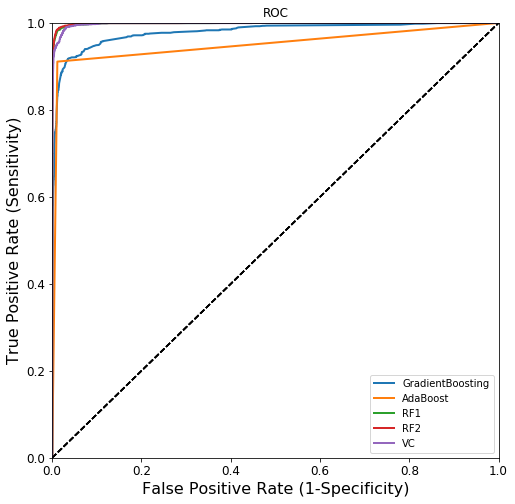

In [33]:
# list of trained models
models = {'GradientBoosting': clf_gb_opt, 
          'AdaBoost': clf_ab_opt,
          'RF1': clf_rf1_opt,
          'RF2': clf_rf2_opt,
          'VC':voting_clf
         }

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

def plot_roc_curve(ax, fpr, tpr, label=None):
    ax.plot(fpr, tpr, linewidth=2, label=label)
    if label is not None:
        ax.legend()
    ax.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (1-Specificity)', fontsize=16)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=16)
    plt.title('ROC')
    
for i, mname in enumerate(models.keys()):
    probs = models[mname].predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    if i == 0:
        fig, ax = plt.subplots(1,1, figsize=(8,8))
    plot_roc_curve(ax, fpr, tpr, label=mname)
plt.show()

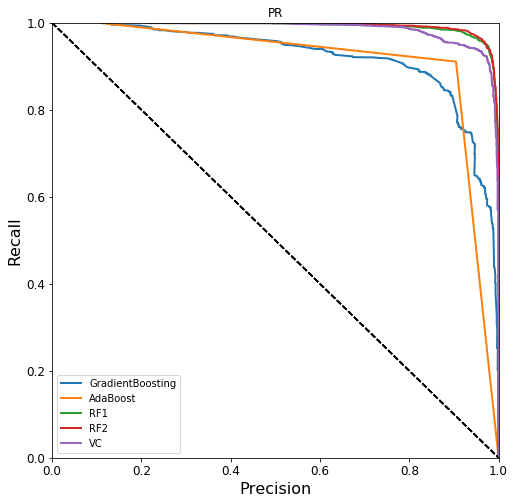

In [183]:
from sklearn.metrics import precision_recall_curve

def plot_pr_curve(ax, precision, recall, label=None):
    ax.plot(precision, recall, linewidth=2, label=label)
    if label is not None:
        ax.legend()
    ax.plot([0, 1], [1, 0], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.title('PR')

for i, mname in enumerate(models.keys()):
    probs = models[mname].predict_proba(X_test)
    preds = probs[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, preds)

    if i == 0:
        fig, ax = plt.subplots(1,1, figsize=(8,8))
    plot_pr_curve(ax, precision, recall, label=mname)

plt.show()

**According to curves above, for digit=7 case, I think Random Forest Classifiers perform better than the others. Although the combined model by the VotingClassifier somehow improves the performances of individual ones, it does not beat our optimal Random Forest Classifiers in terms of PR and ROC curves.**

In [35]:
from sklearn.metrics import f1_score

f1_7 = {}
y_true = y_test
for mname in models.keys():
    y_pred = models[mname].predict(X_test)
    f1_7[mname] = f1_score(y_true, y_pred)
f1_7

{'GradientBoosting': 0.8296583474678944,
 'AdaBoost': 0.9078014184397163,
 'RF1': 0.9474658643832446,
 'RF2': 0.9509781357882623,
 'VC': 0.941908713692946}

For digit 7, find the classifier that produces the best F1 score and plot 4 images that the best classifier mislabels for the given digit. Comment on findings.

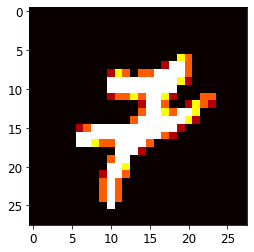

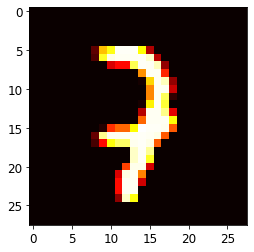

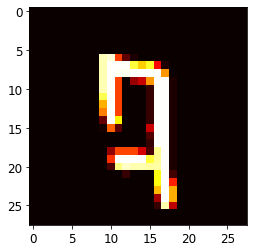

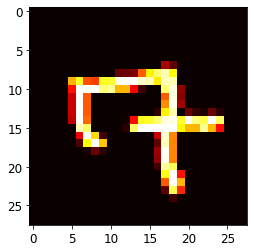

In [98]:
best_model_7 = models[max(f1_7, key=f1_7.get)]
y_pred = best_model_7.predict(X_test)
y_true = y_test

def plot_digit(data, label):
    pixels = np.array(data, dtype='uint8')
    image = pixels.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    
count = 4
for idx, (Xi, yi, yh) in enumerate(zip(X_test, y_true, y_pred)):
    if count == 0:
        break
    if yi != yh:
        plot_digit(Xi, label = 'image'+str(idx))
        plt.show()
        count-=1

Further work: 

Repeat all the works above for all the other digits. For each digit, find the classifier that produces the best F1 score and plot 4 images that your classifier mislabels for the given digit. Comment on findings. (I wrapped this procedure in MNIST_Evaluator.ipynb)

---------------------------------------------
# 2. Multivariate Polynomial Features
##### How many polynomial features $N_F(d, n)$ are there as a function of polynomial degree $d$ and number of variables $n$? For example, for a bivariate $n=2$ degree $3$ polynomial, there are $4$ features ($x^3, x^2y, xy^2, y^3$).

Forum:

Since the degree of a polynomial is determined by the highest degrees of the polynomial's individual terms with non-zero coefficients, shouldn't a bivariate degree 3 polynomial have 9 features in total, including ones with degree less than 3?

Good point, yes, let's include all features with degrees less than or equal to d in the final answer. However, in order to do that you will still have to compute how many features there are with degree equal to d.

**Update:**

For a bivariate $n=2$ degree $d=3$ polynomial, there are $9$ features:
- $x, y$
- $xx, xy, yy$
- $xxx, xxy, xyy, yyy$

##### Answer:
(n, d) for k = 1,2,...,d

- ${2+1-1 \choose 1} = {2 \choose 1} = 2 $
- ${2+2-1 \choose 2} = {3 \choose 2} = 3$
- ${2+3-1 \choose 3} = {4 \choose 3} = 4 $

...
- ${n+d-1 \choose d}$

Therefore, there are totally 
$$\sum_{k = 1}^{d}{n+k-1 \choose k} = {n+d \choose d} - 1$$


------------------------------------------------
# 3. Comparing Feature Map Regressions
Generate $500$ points from the model $y(x) = (x−1)^2(x+1)^2 + ε$ where $ε ∼ N(0, 0.3)$ and $x ∼ N(0, 3)$. 

$$y(x) = x^4-2x^2+1 + ε$$

Using Implement and compare the performance of 
* (1) polynomial regression
* (2) B-spline regression 
* (3) GradientBoostingRegression 
* (4) Gaussian Kernel Regression whith L2 

Choose the optimal model parameters using 5-fold cross-validation. 

Test the performance of each optimal model against a newly simulated 100 points. Comment on results.

##### Generate Data:

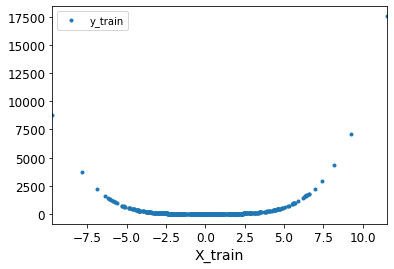

In [197]:
np.random.seed(42)
X_train_1 = np.random.normal(0,3, 500)

coeffs = np.array([1,0,-2,0,1])
px = np.poly1d(coeffs)
y_train_1 = px(X_train_1) + np.random.normal(0,0.3, 500)

data = pd.DataFrame([X_train_1,y_train_1]).T.rename(columns={0:'X_train',1:'y_train'})
data.plot(x='X_train', y='y_train', linewidth=0, marker='.')

##### Prepare datasets:

In [198]:
X_test_1 = np.random.normal(0,3, 100)
y_test_1 = px(X_test_1) + np.random.normal(0,0.3, 100)
data_test = pd.DataFrame([X_test_1,y_test_1]).T.rename(columns={0:'X_test',1:'y_test'})
X_test, y_test = data_test[['X_test']], data_test[['y_test']]
X_train, y_train = data[['X_train']], data[['y_train']]

##### (1) polynomial regression:

In [127]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree_fit=5
polyreg = make_pipeline(PolynomialFeatures(degree_fit, include_bias=True),LinearRegression())
polyreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

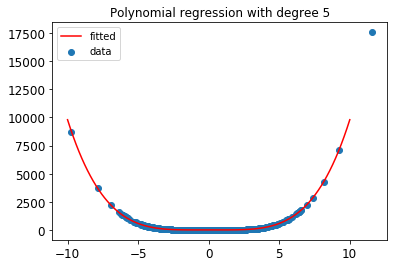

In [175]:
import matplotlib.pyplot as plt
xs = np.linspace(-10,10,100).reshape(-1,1)
ys_hat = polyreg.predict(xs)
plt.figure()
plt.scatter(X_train,y_train,label='data')
plt.plot(xs, ys_hat,color="red",label='fitted')
plt.title("Polynomial regression with degree "+str(degree_fit))
plt.legend()
plt.show()

In [129]:
print('predicted polynomial coefficients:')
print(polyreg['linearregression'].coef_[0][::-1],'\n')
print('actual polynomial coefficients:')
print(px)

predicted polynomial coefficients:
[-6.23443762e-06  1.00008366e+00  4.61125143e-04 -2.00335855e+00
 -1.39350289e-02  0.00000000e+00] 

actual polynomial coefficients:
   4     2
1 x - 2 x + 1


In [133]:
# on training set:
y_train_hat = polyreg.predict(X_train)
mse = mean_squared_error(y_train_hat, y_train)
print('MSE={:2.2g}'.format(mse))

MSE=0.084


In [134]:
# on testing set:
y_test_hat = polyreg.predict(X_test)
mse = mean_squared_error(y_test_hat, y_test)
print('MSE={:2.2g}'.format(mse))

MSE=0.1


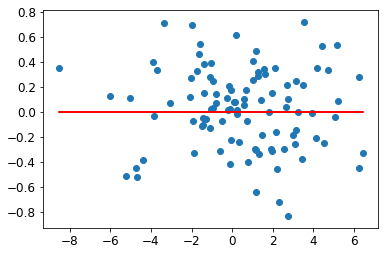

In [135]:
## Plot residuals of testing set
resid = y_test - y_test_hat
plt.scatter(X_test, resid)
plt.plot(X_test, np.zeros_like(X_test), 'red')
plt.show()

##### (2) B-spline regression：

In [113]:
import scipy.interpolate as si
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RANSACRegressor,\
                                 TheilSenRegressor, HuberRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def get_bspline_basis(knots, degree=3, periodic=False):
    """Get spline coefficients for each basis spline."""
    nknots = len(knots)
    y_dummy = np.zeros(nknots)

    knots, coeffs, degree = si.splrep(knots, y_dummy, k=degree,
                                      per=periodic)
    ncoeffs = len(coeffs)
    bsplines = []
    for ispline in range(nknots):
        coeffs = [1.0 if ispl == ispline else 0.0 for ispl in range(ncoeffs)]
        bsplines.append((knots, coeffs, degree))
    return bsplines


class BSplineFeatures(TransformerMixin):
    def __init__(self, knots, degree=3, periodic=False):
        self.bsplines = get_bspline_basis(knots, degree, periodic=periodic)
        self.nsplines = len(self.bsplines)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        nsamples, nfeatures = X.shape
        features = np.zeros((nsamples, nfeatures * self.nsplines))
        for ispline, spline in enumerate(self.bsplines):
            istart = ispline * nfeatures
            iend = (ispline + 1) * nfeatures
            features[:, istart:iend] = si.splev(X, spline)
        return features

MSE=0.11


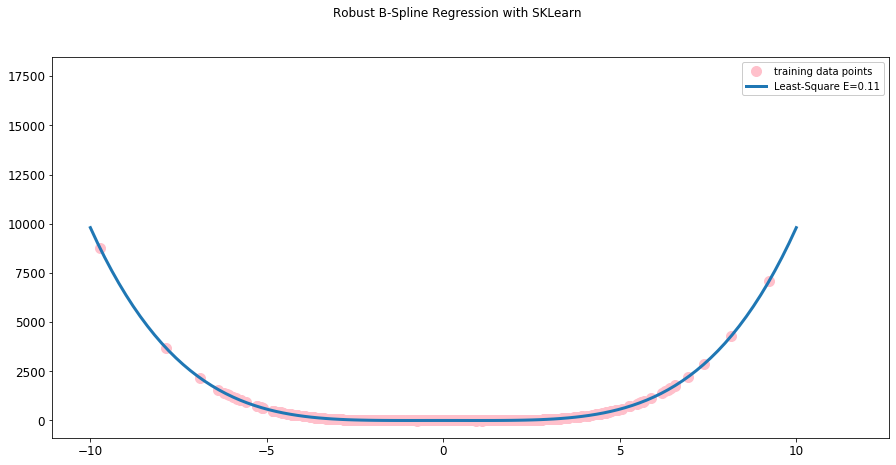

In [167]:
knots = np.linspace(np.percentile(X_train,5),np.percentile(X_train,95),30)
bspline_features = BSplineFeatures(knots, degree=5, periodic=False)

estimators = [
    ('Least-Square', '-', 'C0', LinearRegression(fit_intercept=False)),
    #('Theil-Sen', '-', 'C1', TheilSenRegressor(random_state=42)),
    #('RANSAC', '-', 'C2', RANSACRegressor(random_state=42)),
    #('HuberRegressor', '-', 'C3', HuberRegressor())
]

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.suptitle('Robust B-Spline Regression with SKLearn')
ax.plot(X_train, y_train, 'o', ms=10, color='pink',
        label='training data points')

for label, style, color, estimator in estimators:
    model = make_pipeline(bspline_features, estimator)
    model.fit(X_train, y_train)
    # mse on testing set
    mse = mean_squared_error(model.predict(X_test), y_test)
    print('MSE={:2.2g}'.format(mse))
    y_predicted = model.predict(xs)
    ax.plot(xs, y_predicted, style, lw=3,
            color=color, label=label + ' E={:2.2g}'.format(mse))
ax.legend(loc='upper right', framealpha=1)
plt.show()

##### (3) GradientBoostingRegression：

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

predictor = GradientBoostingRegressor(random_state=42)
params = {
    'max_depth' : [1,2,3],
    'n_estimators' : [3,50,200],
    'learning_rate' : [0.1,0.5,1.]
    }
grid_search = GridSearchCV(predictor,
                           params,
                           scoring = 'neg_mean_squared_error',
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
gbr_opt = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   20.2s finished


MSE=2.4e+04


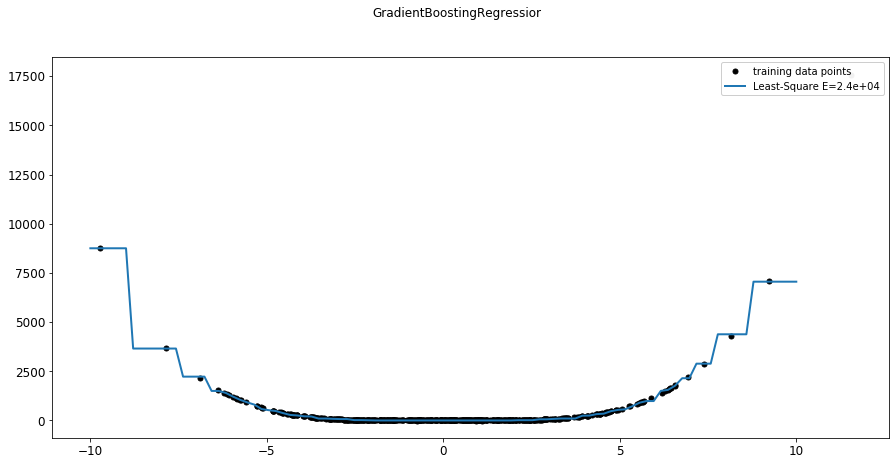

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.suptitle('GradientBoostingRegressior')
ax.plot(X, y, 'o', ms=5, c='black',
        label='training data points')

mse = mean_squared_error(gbr_opt.predict(X_test), y_test)
print('MSE={:2.2g}'.format(mse))

y_predicted = gbr_opt.predict(xs)
ax.plot(xs, y_predicted, lw=2,
        label=label + ' E={:2.2g}'.format(mse))
ax.legend(loc='upper right', framealpha=0.95)
plt.show()

##### (4) Gaussian Kernel Regression whith L2：

In [211]:
# !pip install GPy
# !pip install GPyOpt

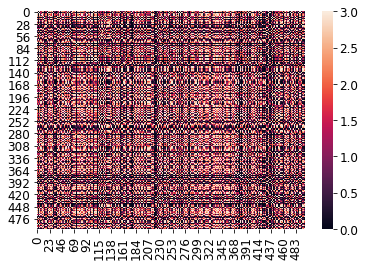

In [206]:
import GPy
import GPyOpt
import seaborn as sns
sigma_f, l = 3, 2
kernel = GPy.kern.RBF(1., sigma_f, l)
sns.heatmap(kernel.K(X_train_1.reshape(-1,1), X_train_1.reshape(-1,1)))
plt.show()

In [207]:
model = GPy.models.GPRegression(X_train_1.reshape(-1,1),y_train_1.reshape(-1,1),kernel) 
mean, variance = model.predict(X_test_1.reshape(-1,1))


Name : GP regression
Objective : 48628977.79246585
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    3.0  |      +ve      |        
  rbf.lengthscale          |    2.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


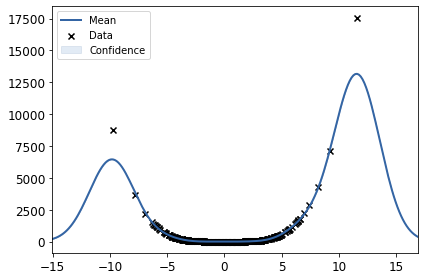

In [208]:
print(model)
model.plot()
plt.show()

Gaussian Kernel Regression with L2 looks good. MSE of all models are printed above.